# Crowdsourced Mapping Analysis

## Ovjective:
Using crowdsourced dataset to differentiate satellite images into different land cover classes (impervious, farm, forest, grass, orchard, water).

## Discussion:
Sinse the target is categorical, we will use classification algorithms intead of regression. In our analysis, first, we will do clustering analysis to gain the natural pattern in the satellite image data, then discuss the clustering result. Second, we are going to use several supervised learning techniques like KNN, Decision Tree, and Random forest to predict the satellite image data, then discuss the their performance to determine which model is the best for classifying satellite images.
***

## Load the data

In [130]:
import pandas as pd
import numpy as np

In [131]:
train_data = pd.read_csv('training.csv', delimiter=',')
test_data = pd.read_csv('testing.csv', delimiter=',')

## An overview of data characteristics

#### The first look into the data

In [368]:
train_data.head(10)

,class,max_ndvi,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,water,997.904,637.5950,658.668,-1882.030,-1924.360,997.904,-1739.99000,630.087,-1628.240,...,-921.193,-1043.160,-1942.490,267.138,366.6080,452.238,211.328,-2203.0200,-1180.190,433.906
1,water,914.198,634.2400,593.705,-1625.790,-1672.320,914.198,-692.38600,707.626,-1670.590,...,-954.719,-933.934,-625.385,120.059,364.8580,476.972,220.878,-2250.0000,-1360.560,524.075
2,water,3800.810,1671.3400,1206.880,449.735,1071.210,546.371,1077.84000,214.564,849.599,...,1562.210,1566.160,2208.440,1056.600,385.2030,300.560,293.730,2762.5700,150.931,3800.810
3,water,952.178,58.0174,-1599.160,210.714,-1052.630,578.807,-1564.63000,-858.390,729.790,...,-1025.880,368.622,-1786.950,-1227.800,304.6210,291.336,369.214,-2202.1200,600.359,-1343.550
4,water,1232.120,72.5180,-1220.880,380.436,-1256.930,515.805,-1413.18000,-802.942,683.254,...,-1813.950,155.624,-1189.710,-924.073,432.1500,282.833,298.320,-2197.3600,626.379,-826.727
5,forest,7091.960,5102.9000,6996.710,201.956,6130.950,6439.300,6818.67000,523.379,593.067,...,7091.960,4953.240,3463.520,395.249,438.9070,340.747,691.058,6010.0400,1762.230,847.726
6,water,6423.920,1585.3100,2891.640,756.563,2978.580,3215.560,5033.86000,5049.720,5520.140,...,521.130,4246.500,2057.000,1579.400,763.2850,683.031,585.142,5754.6300,828.631,399.562
7,water,2455.480,1136.4400,-761.046,205.408,1647.830,1935.800,-44.56840,2158.980,-1367.920,...,1535.000,1959.430,-279.317,-384.915,-113.4060,1020.720,1660.650,-116.8010,-568.050,-1357.140
8,water,2631.760,1116.8600,2631.760,-408.147,1685.700,1046.670,-7.58804,1435.990,-1145.830,...,1287.740,1905.960,-561.347,142.293,48.2714,1272.050,1742.290,-60.3867,-1187.450,-1255.100
9,water,3192.460,1485.7700,-223.142,727.773,180.491,1779.890,2613.97000,1869.390,-333.333,...,3192.460,2152.400,-485.563,480.581,178.7810,1763.990,1480.800,931.3970,-724.129,-1007.910


#### Statistically describe the data

In [133]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,10545,6,forest,7431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_ndvi,10545,NaN,NaN,NaN,7282.72,1603.78,563.444,7285.31,7886.26,8121.78,8650.5
20150720_N,10545,NaN,NaN,NaN,5713.83,2283.95,-433.735,4027.57,6737.73,7589.02,8377.72
20150602_N,10545,NaN,NaN,NaN,4777.43,2735.24,-1781.79,2060.6,5270.02,7484.11,8566.42
20150517_N,10545,NaN,NaN,NaN,4352.91,2870.62,-2939.74,1446.94,4394.34,7317.95,8650.5
20150501_N,10545,NaN,NaN,NaN,5077.37,2512.16,-3536.54,2984.37,5584.07,7440.21,8516.1
20150415_N,10545,NaN,NaN,NaN,2871.42,2675.07,-1815.63,526.911,1584.97,5460.08,8267.12
20150330_N,10545,NaN,NaN,NaN,4898.35,2578.32,-5992.08,2456.31,5638.4,7245.04,8499.33
20150314_N,10545,NaN,NaN,NaN,3338.3,2421.31,-1677.6,1017.71,2872.98,5516.61,8001.7
20150226_N,10545,NaN,NaN,NaN,4902.6,2691.4,-2624.64,2321.55,5672.73,7395.61,8452.38


#### Discuss:
As we can see, the target variable 'class' is categorical variable with multi class, and the predictor variables are all numeric with different scales from each other. Hence, we need to do two things before we do any machine learning application on it. The first thing is to understand the data distribtion. The Second is to normalize the predictors when we do certain machine learning algorithms like k-nearest neighbor.
***

## Preprocessing 

#### Separate the target value from the data set

In [134]:
x_train, y_train = np.array(train_data)[:,1:], np.array(train_data)[:,0]
x_test, y_test = np.array(test_data)[:,1:], np.array(test_data)[:,0]

#### Min-Max normalize the data on train data

In [419]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
scaler = preprocessing.MinMaxScaler().fit(x_train) ### on the scale of train data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

***
## Visualize the data

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Training set distribution

forest        7431
farm          1441
impervious     969
grass          446
water          205
orchard         53
Name: class, dtype: int64

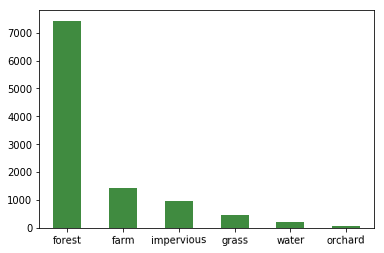

In [367]:
mycolor = ['darkgreen', 'goldenrod', 'grey', 'lightgreen', 'blue', 'orangered']
train_data['class'].value_counts().plot(kind='bar', alpha=0.75, rot=1, color=mycolor)
train_data['class'].value_counts()

#### Test set distribution

forest        78
farm          53
orchard       47
water         46
impervious    40
grass         36
Name: class, dtype: int64

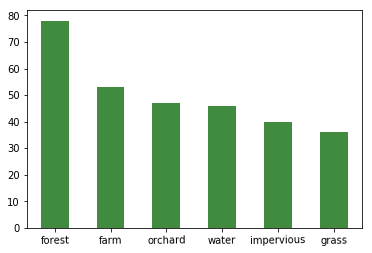

In [626]:
ax = test_data['class'].value_counts().plot(kind='bar', alpha=0.75, rot=1, color=mycolor)
test_data['class'].value_counts()

#### Discuss: 
The distributions are not cheerful for classification since we have imbalance data. Imbalance data may cause inaccurate prediction. For example, in decision tree algorithm, the minority class could be ignored accroding to its greedy-approach characteristic. Since the algorithm is always choosing the best split (the most homogeneous node to split), the majority class is more prominent than minority class in the approach. At the end, the minority class might just be ignored by the limitation of set parameter like minimum instance to split. On the other hand, KNN accuracy could also be affected by imbalance data. Let's say we set k=5 for classifying and the minority class only have two instances in the dataset. If we pass a new instance for classifying and it is actually in the minority group, it will never being classified to its real group since the group has too less to account.(Figure 1)

Therefore, we have to randomly sample the minority class to see the different results in both imbalance data and oversampling data, then use our judge to determine which result is better to relect the reality for classification.

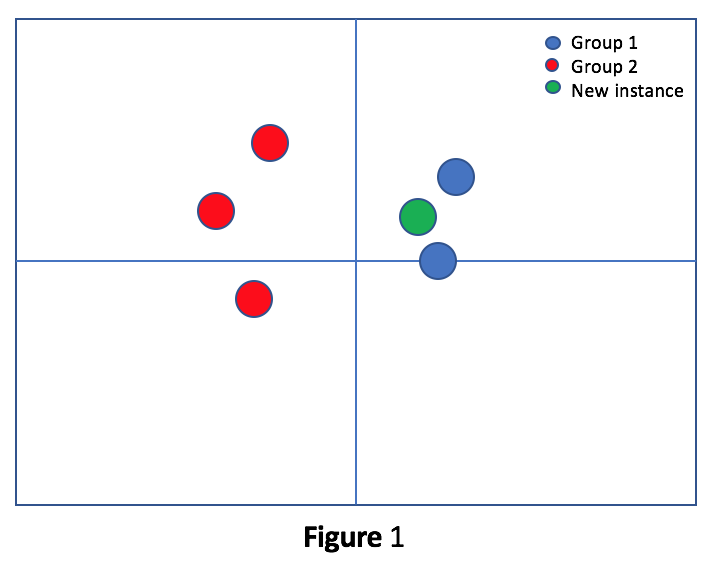

In [428]:
from IPython.display import Image
Image(filename=wd+'fig1.png', width=400)

***

#### Visualize the data characteristic by PCA

In [420]:
pca = PCA(n_components=2).fit(x_train).transform(x_train)
df = pd.DataFrame({'PCA 1':pca[:,0], 'PCA 2':pca[:,1], 'class': y_train})

In [421]:
#### extract subdata according to class labels
forest = df['class']=='forest'
farm = df['class']=='farm'
impervious = df['class']=='impervious'
grass = df['class']=='grass'
water = df['class']=='water'
orchard = df['class']=='orchard'

forest        7431
farm          1441
impervious     969
grass          446
water          205
orchard         53
Name: class, dtype: int64

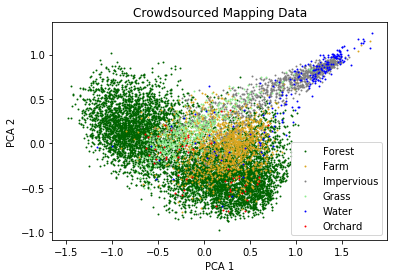

In [422]:
ax = df[forest].plot.scatter(x='PCA 1', y='PCA 2', c='darkgreen', label='Forest', s=0.9,
                             title='Crowdsourced Mapping Data')
df[farm].plot.scatter(x='PCA 1', y='PCA 2', c='goldenrod', label='Farm', ax=ax, s=0.9)
df[impervious].plot.scatter(x='PCA 1', y='PCA 2', c='grey', label='Impervious', ax=ax, s=0.9)
df[grass].plot.scatter(x='PCA 1', y='PCA 2', c='lightgreen', label='Grass', ax=ax, s=0.9)
df[water].plot.scatter(x='PCA 1', y='PCA 2', c='blue', label='Water', ax=ax, s=0.9)
df[orchard].plot.scatter(x='PCA 1', y='PCA 2', c='red', label='Orchard', ax=ax, s=0.9)
train_data['class'].value_counts()

#### Discuss:
In this plot, we can visually apprehend the data characteristic and get some before-hand perspectives in the classification result. The water, impervious, farm, and grass are quite distributed saperately, which is a good thing for classification. However, the forest almost overlaps the farm, grass, and orchard. Also, the orchard seems too sparse in the plot. These might indicate that it would be difficult to  distinguish farm, grass and orchard from forest, and there would be serious misclassification while classifying orchard.
***

## Clustering Analysis

In [505]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [284]:
kmeans_dic={'k':[i for i in range(3,30)], 'Error':[]}
for k in range(3,30):
    kmeans = KMeans(n_clusters=k, max_iter=500, n_init=5)
    kmeans.fit(x_train)
    kmeans_dic['Error'].append(kmeans.inertia_)

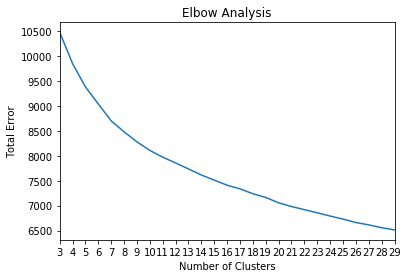

In [405]:
ax = pd.DataFrame(kmeans_dic).plot(x='k', title='Elbow Analysis',
                                   xticks=kmeans_dic['k'], legend=None)
ax.set_ylabel('Total Error')
ax.set_xlabel('Number of Clusters')

#### Discuss:
The elbow method is to find the best k by finding the elbow in a Error-vs-k plot. The idea is to find a point (k) before fitting noisy. To illustrate, the total error is the sum of the distances from every data point to its corresponding centriod. While doing clustering, we want to minimize the total error. However, the total error will keep droping till k equals to the size of the whole data (every point is its own centroid), so that we cannot actually minimize the total error, but find a point that if a number of k is greater than this point, the total error won't decrease steeply because it is fitting nosiy in the data after this point.

To see the natural pattern of this data, we use elbow method to get the most natural k in this data, and the elbow happens when k=7.

After knowing the k, we can apply PCA techniques on visualizing the natural pattern of the digital satellite data.
***

#### PCA for visualization

In [ ]:
pca = PCA(n_components=2).fit(mat_norm).transform(mat_norm)
df = pd.DataFrame({'PCA 1':pca[:,0], 'PCA 2':pca[:,1], 'class': y_train})

#### K-means Clustering

In [409]:
kmeans = KMeans(n_clusters=7, max_iter=500, n_init=5)
kmeans.fit(x_train)
c7 = kmeans.predict(x_train)+1

#### Cluster Centroids

In [680]:
features=list(train_data)[1:]
features=pd.DataFrame(features)
features.columns=["Features"]
clusters_pd=pd.DataFrame(kmeans.cluster_centers_.T)
clusters_pd.columns=["cluster 1","cluster 2","cluster 3","cluster 4","cluster 5","cluster 6","cluster 7"]
features_cluster_centers=pd.concat((features,clusters_pd),1)
features_cluster_centers.set_index('Features')

,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7
Features,,,,,,,
max_ndvi,0.790397,0.241307,0.889979,0.929027,0.897497,0.900130,0.911721
20150720_N,0.515064,0.248660,0.790472,0.766730,0.848316,0.725259,0.857809
20150602_N,0.533458,0.292294,0.660473,0.882141,0.645419,0.812266,0.432910
20150517_N,0.498459,0.317623,0.685073,0.724124,0.601993,0.657476,0.779517
20150501_N,0.588079,0.390920,0.758916,0.783003,0.815762,0.697619,0.872974
20150415_N,0.377090,0.298753,0.314278,0.846918,0.571735,0.556487,0.225167
20150330_N,0.749841,0.496456,0.768600,0.883096,0.805589,0.794488,0.643163
20150314_N,0.556525,0.292720,0.716473,0.509154,0.382058,0.645107,0.339743
20150226_N,0.574827,0.308549,0.671252,0.822871,0.750835,0.764996,0.720136


#### Discuss:
Values of Cluster Centers with respective to every feature will gives a rough outline of the feature values in that cluster. Also, this tells us the how each clusters differs with other. 

#### Clustering Visualization

In [410]:
df2 = pd.DataFrame({'PCA 1':pca[:,0], 'PCA 2':pca[:,1], 'cluster': c7})

In [411]:
Cluster1 = df2['cluster']==1
Cluster2 = df2['cluster']==2
Cluster3 = df2['cluster']==3
Cluster4 = df2['cluster']==4
Cluster5 = df2['cluster']==5
Cluster6 = df2['cluster']==6
Cluster7 = df2['cluster']==7

Cluster
1    1897
4    1782
3    1745
6    1664
7    1549
5    1041
2     867
Name: 0, dtype: int64


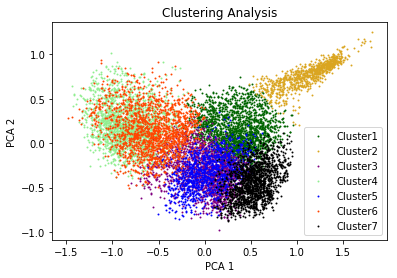

In [545]:
ax = df2[Cluster1].plot.scatter(x='PCA 1', y='PCA 2', c='darkgreen', label='Cluster1', s=0.9,
                               title='Clustering Analysis')
df2[Cluster2].plot.scatter(x='PCA 1', y='PCA 2', c='goldenrod', label='Cluster2', ax=ax, s=0.9)
df2[Cluster3].plot.scatter(x='PCA 1', y='PCA 2', c='purple', label='Cluster3', ax=ax, s=0.9)
df2[Cluster4].plot.scatter(x='PCA 1', y='PCA 2', c='lightgreen', label='Cluster4', ax=ax, s=0.9)
df2[Cluster5].plot.scatter(x='PCA 1', y='PCA 2', c='blue', label='Cluster5', ax=ax, s=0.9)
df2[Cluster6].plot.scatter(x='PCA 1', y='PCA 2', c='orangered', label='Cluster6', ax=ax, s=0.9)
df2[Cluster7].plot.scatter(x='PCA 1', y='PCA 2', c='black', label='Cluster7', ax=ax, s=0.9)
print('Cluster')
print(pd.DataFrame(c7)[0].value_counts())

#### Discuss:
Since the data is obtained by digitizing satellite images of landscape, knowing this pattern is quite important. We could use the clustering result as feedback to discuss some thing deeper. For instance, it could help to reinforce the digitizing algorithm, to find some human error in marking the label, or to discover the unknown change on remote landscape.
***

## Classification

In [527]:
from sklearn.metrics import classification_report

In [150]:
def acc(a,p): #### actual, predicted
    m = p == a
    return np.count_nonzero(m == True)/len(m)

### KNN
#### Model Selection

In [430]:
from sklearn import neighbors

In [601]:
%%time
knn_dic = {'k':[i for i in range(1,21)]}
knnclf = neighbors.KNeighborsClassifier()
for weight in ['distance', 'uniform']:
    for k in range(1,21):
        knnclf.set_params(n_neighbors=k, weights=weight)
        knnclf.fit(x_train, y_train)
        if weight not in knn_dic:
            knn_dic[weight] = [acc(y_test, knnclf.predict(x_test))]
        else:
            knn_dic[weight].append(acc(y_test, knnclf.predict(x_test)))

CPU times: user 7.69 s, sys: 45.4 ms, total: 7.73 s
Wall time: 7.8 s


Distance has the best acc 0.6433 while k = 7
Uniform has the best acc 0.6433 while k = 5


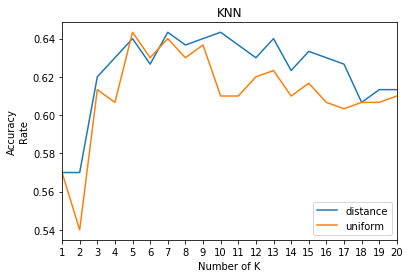

In [602]:
ax = pd.DataFrame(knn_dic).plot(x='k', title='KNN', xticks=knn_dic['k']) ## xticks specify scales on x axis
ax.set_ylabel('Accuracy\nRate')
ax.set_xlabel('Number of K')
#####
best_dist_acc = max(knn_dic['distance'])
best_dist_k = knn_dic['k'][knn_dic['distance'].index(best_dist_acc)]
best_uni_acc = max(knn_dic['uniform'])
best_uni_k = knn_dic['k'][knn_dic['uniform'].index(best_uni_acc)]
print('Distance has the best acc {:.4f} while k = {}'.format(best_dist_acc, best_dist_k))
print('Uniform has the best acc {:.4f} while k = {}'.format(best_uni_acc, best_uni_k))

#### Report:
The plot dipicts that when the k equals to 7, the KNN classifier has its bset accuracy, 0.6433, for the distance weight method, and when the k equals to 5, the KNN classifier has its bset accuracy, 0.6433, for the uniform weight method. Since we know the best parameters, we can build the best KNN classifier to assess thier performance.

#### Model Performance

KNN Classifier: {Weights: distance, k: 7}
Overall Accuracy: 0.6433
------------------------------------------------------------
Confusion Matrix
Predicted   farm  forest  grass  impervious  orchard  water
Actual                                                     
farm          45       6      1           1        0      0
forest         9      42     25           2        0      0
grass          5       4     19           7        0      1
impervious     1       0      1          38        0      0
orchard       16      12      3           0       16      0
water          1       1      2           9        0     33
------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

       farm       0.58      0.85      0.69        53
     forest       0.65      0.54      0.59        78
      grass       0.37      0.53      0.44        36
 impervious       0.67      0.95      0.78        40
    orchard       1.00    

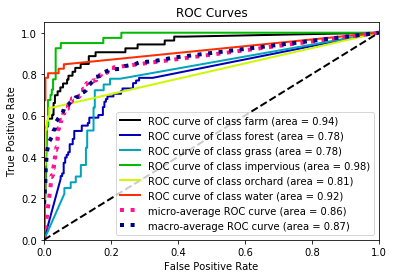

In [603]:
import scikitplot as skplt
knnclf = neighbors.KNeighborsClassifier(n_neighbors=7, weights='distance')
knnclf.fit(x_train, y_train)
p = knnclf.predict(x_test)
print('KNN Classifier: {Weights: distance, k: 7}')
print('Overall Accuracy: {:.4f}'.format(best_dist_acc))
print('-'*60, 'Confusion Matrix', sep='\n')
print(pd.crosstab(y_test, p, rownames=['Actual'], colnames=['Predicted']))
print('-'*60, 'Classification Report', sep='\n')
print(classification_report(y_test, p))
y_probas = knnclf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### Discuss:
The KNN overall accuracy is 0.6433. In the classification matrix, we could see how the KNN classifier classifies test-set instances. We can see the classifier has some dificaulties in classifying forest and orchard, the recall of these two are only 0.54 and 0.34, respectively. This might be caused by the sparse characteristic we have seen in the PCA visualization. It is worth to mention the precisions of orchard and water are pretty high so that we can really count on these two predicted classes. Fianlly, the average area under curve (AUC) is 0.87. (We will discuss AUC more in the conclusion part.)

***
### Decision Tree
#### Model Selection

In [460]:
from sklearn import cross_validation
from sklearn import tree

In [482]:
%%time
dt_dic = {'Complexity':[i for i in range(2,70)]}
treeclf = tree.DecisionTreeClassifier(random_state=920)
for crit in ['gini', 'entropy']:
    for cp in range(2,70):
        treeclf.set_params(criterion=crit, max_leaf_nodes=cp)
        xval_acc = cross_validation.cross_val_score(treeclf, x_train, y_train, cv=10).mean()
        treeclf.fit(x_train, y_train)
        test_acc = acc(y_test, treeclf.predict(x_test))
        if crit not in dt_dic:
            dt_dic[crit] = [[xval_acc],[test_acc]]
        else:
            dt_dic[crit][0].append(xval_acc)
            dt_dic[crit][1].append(test_acc)
dt_gini_dic = {'Complexity':dt_dic['Complexity'], 'xval': dt_dic['gini'][0], 'test':dt_dic['gini'][1]}
dt_entropy_dic = {'Complexity':dt_dic['Complexity'], 'xval': dt_dic['entropy'][0], 'test':dt_dic['entropy'][1]}

CPU times: user 8min 12s, sys: 3.43 s, total: 8min 15s
Wall time: 8min 18s


Gini has the best acc 0.6000 while cp = 47
Entropy has the best acc 0.6067 while cp = 51


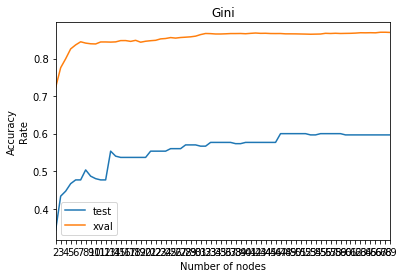

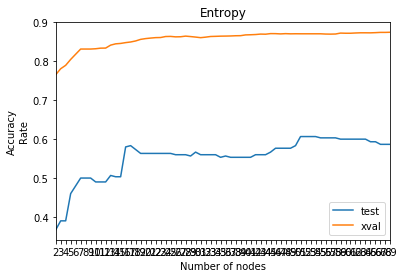

In [572]:
ax = pd.DataFrame(dt_gini_dic).plot(x='Complexity', title='Gini', xticks=dt_gini_dic['Complexity'])
ax.set_ylabel('Accuracy\nRate')
ax.set_xlabel('Number of nodes')
ax1 = pd.DataFrame(dt_entropy_dic).plot(x='Complexity', title='Entropy', xticks=dt_entropy_dic['Complexity'])
ax1.set_ylabel('Accuracy\nRate')
ax1.set_xlabel('Number of nodes')
best_gini_acc = max(dt_gini_dic['test'])
best_gini_cp = dt_gini_dic['Complexity'][dt_gini_dic['test'].index(best_gini_acc)]
best_entropy_acc = max(dt_entropy_dic['test'])
best_entropy_cp = dt_entropy_dic['Complexity'][dt_entropy_dic['test'].index(best_entropy_acc)]
print('Gini has the best acc {:.4f} while cp = {}'.format(best_gini_acc, best_gini_cp))
print('Entropy has the best acc {:.4f} while cp = {}'.format(best_entropy_acc, best_entropy_cp))

#### Report:
For finding the best parameters for decision tree model, we set two different split criteria, Gini impurity and Entropy, to loop throught the numbers of nodes (complexity). Since we want to avoid overfitting, we need to find a point that testing accuracy and cross validation accuracy diverge. This point happened when the numbers of nodes is 47 using gini impurity, and when the numbers of nodes is 51 using entropy. However, the latter's accuracy is slightly higher the former. Therefore, we have the best parameters for decision tree classifier, which are criterion='entropy' and max_leaf_nodes=51.

#### Model Performance

Decision Tree Classifier: {criterion: entropy, max_leaf_nodes: 51}
Overall Accuracy: 0.6267
------------------------------------------------------------
Confusion Matrix
Predicted   farm  forest  grass  impervious  water
Actual                                            
farm          39      12      1           1      0
forest         4      63      8           3      0
grass         11      14      9           2      0
impervious     2       1      2          33      2
orchard        6      40      1           0      0
water          3       2      1           2     38
------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

       farm       0.60      0.74      0.66        53
     forest       0.48      0.81      0.60        78
      grass       0.41      0.25      0.31        36
 impervious       0.80      0.82      0.81        40
    orchard       0.00      0.00      0.00        47
      water       0.

/Users/JoseYueh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


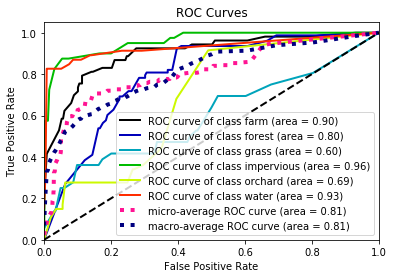

In [607]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=51, random_state=920)
treeclf.fit(x_train, y_train)
p = treeclf.predict(x_test)
y_probas = treeclf.predict_proba(x_test)
print('Decision Tree Classifier: {criterion: entropy, max_leaf_nodes: 51}')
print('Overall Accuracy: {:.4f}'.format(best_entropy_acc))
print('-'*60, 'Confusion Matrix', sep='\n')
print(pd.crosstab(y_test, p, rownames=['Actual'], colnames=['Predicted']))
print('-'*60, 'Classification Report', sep='\n')
print(classification_report(y_test, p))
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### Discuss:
The decision tree overall accuracy is 0.6067. In the classification matrix, we could see almost all the orchard instances was classified to forest, and the precision and recall of orchard are both 0. This might show the downside of decision tree algorithm to classify minority group. However, the classification report shows this model is still good at predicting most of group (not grass and orchard), and the predicted result in impervious (precision: 0.8) and water (precision: 0.95) is trustworthy. Lastly, the AUC of this model is 0.81.

***
### Random Forest
#### Model selection

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [617]:
%%time
rf_dic = {'Num_of_tree':[i for i in range(1,100)], 'xval_acc':[], 'test_acc':[]}
rfclf = RandomForestClassifier(random_state=920)
for nt in range(1,100):
    rfclf.set_params(n_estimators = nt)
    xval_acc = cross_validation.cross_val_score(rfclf, x_train, y_train, cv=5).mean()
    rfclf.fit(x_train, y_train)
    test_acc = acc(y_test, rfclf.predict(x_test))
    rf_dic['xval_acc'].append(xval_acc)
    rf_dic['test_acc'].append(test_acc)

CPU times: user 19min 45s, sys: 7.41 s, total: 19min 52s
Wall time: 20min 9s


Random Forest has the best acc 0.6400 while nt = 32


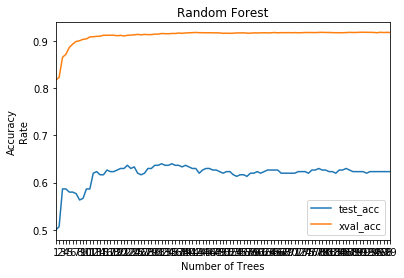

In [618]:
ax = pd.DataFrame(rf_dic).plot(x='Num_of_tree', title='Random Forest', xticks=rf_dic['Num_of_tree']) ## xticks specify scales on x axis
ax.set_ylabel('Accuracy\nRate')
ax.set_xlabel('Number of Trees')
best_rf_acc = max(rf_dic['test_acc'])
best_nt = rf_dic['Num_of_tree'][rf_dic['test_acc'].index(best_rf_acc)]
print('Random Forest has the best acc {:.4f} while nt = {}'.format(best_rf_acc, best_nt))

#### Report: 
To avoid getting the random forest model too complex to predict new data, we loop through the number of trees in the forest to get the bset number of it. According to the plot, the best parameter, number of trees, for random forest model is 32.

#### Model Performance

Random Forest Classifier: {n_estimators: 26}
Overall Accuracy: 0.6400
------------------------------------------------------------
Confusion Matrix
Predicted   farm  forest  grass  impervious  water
Actual                                            
farm          40      12      1           0      0
forest         5      69      3           1      0
grass          9      19      6           2      0
impervious     4       1      0          35      0
orchard        4      43      0           0      0
water          2       4      1           4     35
------------------------------------------------------------
Calssification Report
             precision    recall  f1-score   support

       farm       0.62      0.75      0.68        53
     forest       0.47      0.88      0.61        78
      grass       0.55      0.17      0.26        36
 impervious       0.83      0.88      0.85        40
    orchard       0.00      0.00      0.00        47
      water       1.00      0.76      0.86

/Users/JoseYueh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


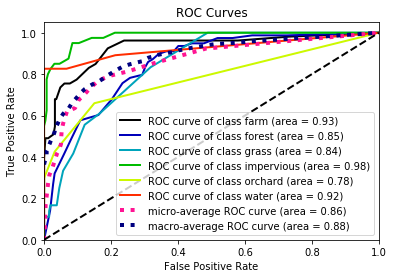

In [620]:
rfclf = RandomForestClassifier(random_state=920, n_estimators = 26)
rfclf.fit(x_train, y_train)
p = rfclf.predict(x_test)
y_probas = rfclf.predict_proba(x_test)
print('Random Forest Classifier: {n_estimators: 26}')
print('Overall Accuracy: {:.4f}'.format(best_rf_acc))
print('-'*60, 'Confusion Matrix', sep='\n')
print(pd.crosstab(y_test, p, rownames=['Actual'], colnames=['Predicted']))
print('-'*60, 'Calssification Report', sep='\n')
print(classification_report(y_test, p))
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### Discuss:
The random forest overall accuracy is 0.64. In the classification matrix and classification report, we can see the similar result as decision tree. This is because random forest are just a bunch of decision tree using a voting mechanism to classify. It inherits the characteristic of decision tree and theoretically has a better accuracy than decision tree does. In result, the random forest classifier are still not able to distiguish orchard from others. Lastly, the AUC in ROC curve plot is 0.88.

***
## Random Oversampling
After doing several classifying, we notice that the minority group, orchard, is ignored by the classifiers due to thier algorithm. To not suffer from the imbalance data, we could oversample the minorities to force them being noticible to the classifiers. For example, in figure 1, the new intance will not being assigned to group 1 when k=5. However, if we oversample the group 1 to the number of group 2, the result will change. In this example, it will increass accuracy (see figure2). For another example, in decision tree algorithm, minimum split limitation is highly possible to ignore the minority. Let's say the the limitation is 'don't split if a node contains less than 20 instances'. In this case, if the minority count is 15 in the train data, the trained tree will never split a node to classify the minority. Hence, we need to do the oversampling.

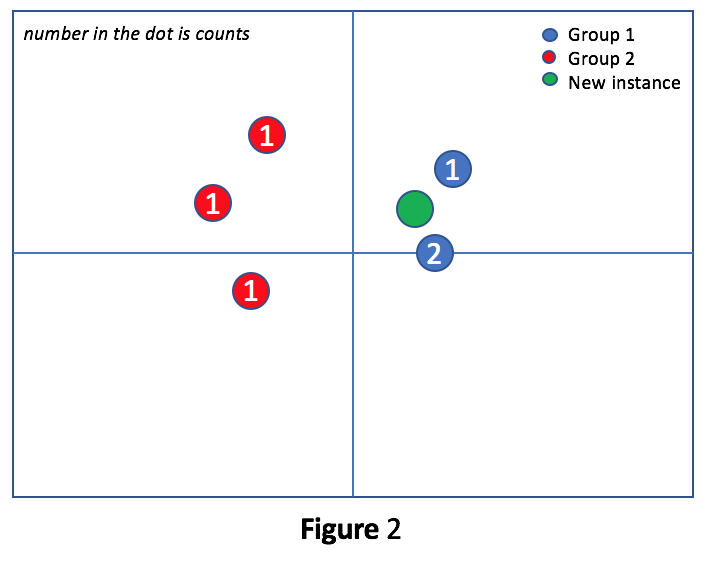

In [623]:
Image(filename=wd+'fig2.png', width=400)

#### My oversampling function:
My way to oversample is to ramdomly pick a instance from each minority group, then add it the data till the count of each minority is the same as th mojority (see figure 3).

In [143]:
def my_os_func(mat, t, seed=None):
    import random as rd
    from collections import Counter
    d = Counter(t)
    at_top = max(d.values())
    new_mat, new_t = mat.copy(), t.copy()
    if seed:
        rd.seed(a=seed)
    for key in d:
        pool = mat[t == key,:]
        for i in range(at_top - d[key]):
            sampling = pool[[rd.randint(0,d[key]-1)],:]
            new_mat = np.concatenate((new_mat,sampling), axis=0)
            new_t = np.append(new_t, [key])
    return new_mat, new_t

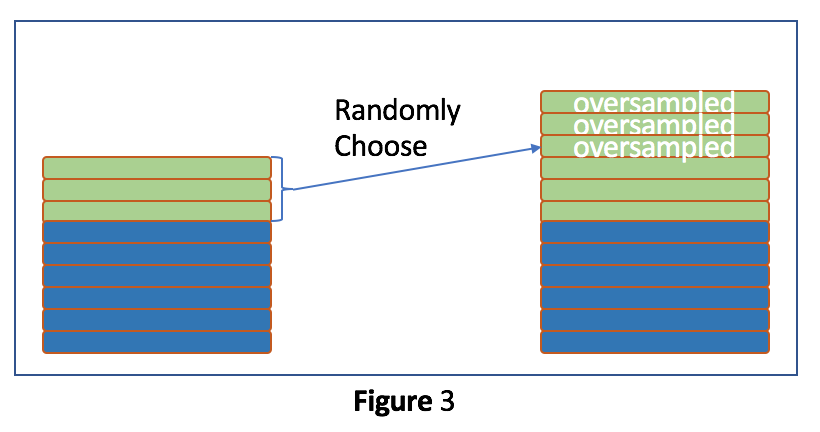

In [624]:
Image(filename=wd+'fig3.png', width=400)

In [110]:
%%time
os_x_train, os_y_train = my_os_func(x_train, y_train, seed=920)

CPU times: user 52.9 s, sys: 33.9 s, total: 1min 26s
Wall time: 1min 26s


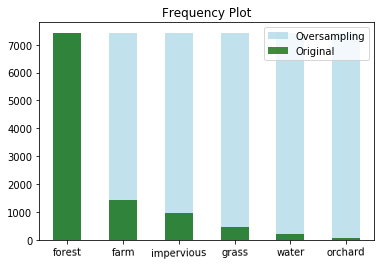

In [650]:
ax = pd.DataFrame(os_y_train)[0].value_counts().plot(kind='bar', title='Frequency Plot',alpha=0.75,rot=1, color=['lightblue'])
train_data['class'].value_counts().plot(kind='bar', alpha=0.75, rot=1, color=mycolor, ax=ax)
ax.legend(['Oversampling','Original'])

#### Discuss:
With all being said, the overall accuracy might drop when we use oversampling data to train the model. To illustrate, if we have a set of data with a 80% mojority and blindly classify all data point into the majority group, we will get an 80% overall accuracy no matter what. Now, if we oversample the dataset and retrain the model by oversampled data, the overall accuracy is very likely to be below 80%.

***
### KNN
#### Model Selection

In [654]:
%%time
os_knn_dic = {'k':[i for i in range(1,35)]}
knnclf = neighbors.KNeighborsClassifier()
for weight in ['distance', 'uniform']:
    for k in range(1,35):
        knnclf.set_params(n_neighbors=k, weights=weight)
        knnclf.fit(os_x_train, os_y_train)
        if weight not in os_knn_dic:
            os_knn_dic[weight] = [acc(y_test, knnclf.predict(x_test))]
        else:
            os_knn_dic[weight].append(acc(y_test, knnclf.predict(x_test)))

CPU times: user 48.3 s, sys: 162 ms, total: 48.4 s
Wall time: 48.6 s


Distance has the best acc 0.6167 while k = 29
Uniform has the best acc 0.6200 while k = 29


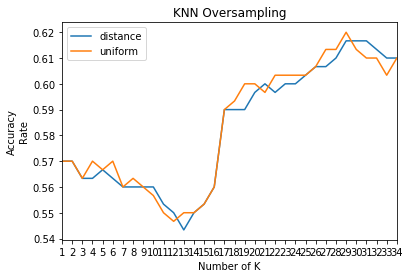

In [655]:
ax = pd.DataFrame(os_knn_dic).plot(x='k', title='KNN Oversampling', xticks=os_knn_dic['k']) ## xticks specify scales on x axis
ax.set_ylabel('Accuracy\nRate')
ax.set_xlabel('Number of K')
os_best_dist_acc = max(os_knn_dic['distance'])
best_dist_k = os_knn_dic['k'][os_knn_dic['distance'].index(os_best_dist_acc)]
os_best_uni_acc = max(os_knn_dic['uniform'])
best_uni_k = os_knn_dic['k'][os_knn_dic['uniform'].index(os_best_uni_acc)]
print('Distance has the best acc {:.4f} while k = {}'.format(best_dist_acc, best_dist_k))
print('Uniform has the best acc {:.4f} while k = {}'.format(best_uni_acc, best_uni_k))

#### Report:
By using oversampled data, the KNN classifier has its bset accuracy, 0.62, for the distance weight method when the k equals to 29 and the weight is uniform. We can notice that the accuracy is sightly lower than not using oversampled data, and this matches what we just discussed about.

#### Model Performance

KNN Classifier: {weights: uniform, n_neighbors: 27}
Overall Accuracy: 0.6200
------------------------------------------------------------
Confusion Matrix
Predicted   farm  forest  grass  impervious  orchard  water
Actual                                                     
farm          44       1      2           2        2      2
forest        11      25     33           5        1      3
grass          5       2     23           3        0      3
impervious     1       0      7          30        0      2
orchard        8       9      4           0       26      0
water          0       0      4           4        0     38
------------------------------------------------------------
Calssification Report
             precision    recall  f1-score   support

       farm       0.64      0.83      0.72        53
     forest       0.68      0.32      0.43        78
      grass       0.32      0.64      0.42        36
 impervious       0.68      0.75      0.71        40
    orchard     

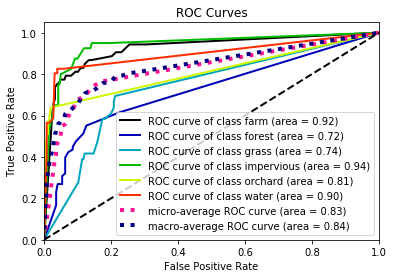

In [657]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors=29, weights='uniform')
knnclf.fit(os_x_train, os_y_train)
p = knnclf.predict(x_test)
y_probas = knnclf.predict_proba(x_test)
print('KNN Classifier: {weights: uniform, n_neighbors: 27}')
print('Overall Accuracy: {:.4f}'.format(os_best_uni_acc))
print('-'*60, 'Confusion Matrix', sep='\n')
print(pd.crosstab(y_test, p, rownames=['Actual'], colnames=['Predicted']))
print('-'*60, 'Calssification Report', sep='\n')
print(classification_report(y_test, p))
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### Discuss:
Using oversampled data, the overall accuracy is 0.62 slightly droped by 2.33% (from 0.6433). In the classification report, however, there is a 21% improvement in the recall on orchard (from 0.34 to 0.55), but a 22% decrease in the recall on forest (from 0.54 to 0.32). This is because the oversampling makes the count of orchard the same magnitude as the majority, so that the classifier cannot ingore it (figure 2). Conversely, it also relatively makes the majority sparse, in result, the recall on majority drops.

***
### Decision Tree
#### Model Selection

In [664]:
%%time
os_dt_dic = {'Complexity':[i for i in range(2,70)]}
treeclf = tree.DecisionTreeClassifier(random_state=920)
for crit in ['gini', 'entropy']:
    for cp in range(2,70):
        treeclf.set_params(criterion=crit, max_leaf_nodes=cp)
        xval_acc = cross_validation.cross_val_score(treeclf, os_x_train, os_y_train, cv=10).mean()
        treeclf.fit(os_x_train, os_y_train)
        test_acc = acc(y_test, treeclf.predict(x_test))
        if crit not in os_dt_dic:
            os_dt_dic[crit] = [[xval_acc],[test_acc]]
        else:
            os_dt_dic[crit][0].append(xval_acc)
            os_dt_dic[crit][1].append(test_acc)
os_dt_gini_dic = {'Complexity': os_dt_dic['Complexity'],
                  'xval': os_dt_dic['gini'][0], 'test':os_dt_dic['gini'][1]}
os_dt_entropy_dic = {'Complexity': os_dt_dic['Complexity'],
                  'xval': os_dt_dic['entropy'][0], 'test':os_dt_dic['entropy'][1]}

CPU times: user 16min 38s, sys: 6.84 s, total: 16min 45s
Wall time: 16min 55s


Gini has the best acc 0.5933 while cp = 13
Entropy has the best acc 0.6267 while cp = 58


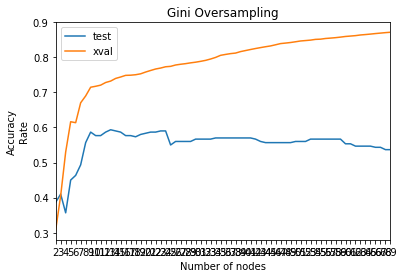

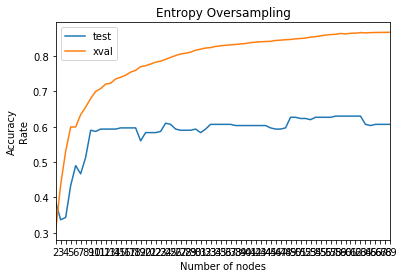

In [665]:
ax = pd.DataFrame(os_dt_gini_dic).plot(x='Complexity', title='Gini Oversampling', xticks=os_dt_gini_dic['Complexity'])
ax.set_ylabel('Accuracy\nRate')
ax.set_xlabel('Number of nodes')
ax1 = pd.DataFrame(os_dt_entropy_dic).plot(x='Complexity', title='Entropy Oversampling', xticks=os_dt_entropy_dic['Complexity'])
ax1.set_ylabel('Accuracy\nRate')
ax1.set_xlabel('Number of nodes')
os_best_gini_acc = max(os_dt_gini_dic['test'])
best_gini_cp = os_dt_gini_dic['Complexity'][os_dt_gini_dic['test'].index(os_best_gini_acc)]
os_best_entropy_acc = max(os_dt_entropy_dic['test'])
best_entropy_cp = os_dt_entropy_dic['Complexity'][os_dt_entropy_dic['test'].index(os_best_entropy_acc)]
print('Gini has the best acc {:.4f} while cp = {}'.format(best_gini_acc, best_gini_cp))
print('Entropy has the best acc {:.4f} while cp = {}'.format(best_entropy_acc, best_entropy_cp))

#### Report:
The best parameters for decision tree model using oversampled data are criterion=entropy and max_leaf_nodes=58.

#### Model Performance

Decision Tree Classifier: {criterion: entropy, max_leaf_nodes: 58}
Overall Accuracy: 0.6300
------------------------------------------------------------
Confusion Matrix
Predicted   farm  forest  grass  impervious  orchard  water
Actual                                                     
farm          42       5      1           1        3      1
forest        10      47     17           2        2      0
grass          9       7     11           2        5      2
impervious     0       1      0          33        1      5
orchard        9      19      1           0       17      1
water          1       3      2           2        0     38
------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

       farm       0.59      0.79      0.68        53
     forest       0.57      0.60      0.59        78
      grass       0.34      0.31      0.32        36
 impervious       0.82      0.82      0.82        40
 

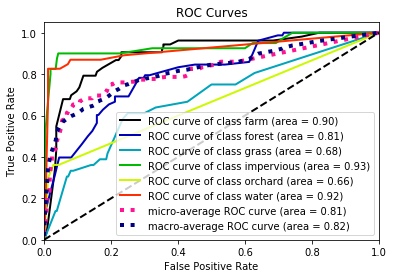

In [667]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=49, random_state=920)
treeclf.fit(os_x_train, os_y_train)
p = treeclf.predict(x_test)
y_probas = treeclf.predict_proba(x_test)
print('Decision Tree Classifier: {criterion: entropy, max_leaf_nodes: 58}')
print('Overall Accuracy: {:.4f}'.format(os_best_entropy_acc))
print('-'*60, 'Confusion Matrix', sep='\n')
print(pd.crosstab(y_test, p, rownames=['Actual'], colnames=['Predicted']))
print('-'*60, 'Classification Report', sep='\n')
print(classification_report(y_test, p))
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### Discuss:
The decision tree model on oversampled data has 0.63 overall accuracy, which is better than it on original data (acc. 0.6067). Also, we can see it sacrifices some forest recall to imporve the recall on orchard by 36% (from 0%), On the downside, the predicted result in grass of this model is only 34% accountability in the perspecttives of precision. Finally, the average AUC is 0.82.

***
### Random Forest
#### Model Selection

In [668]:
%%time
os_rf_dic = {'Num_of_tree':[i for i in range(1,100)], 'xval_acc':[], 'test_acc':[]}
rfclf = RandomForestClassifier(random_state=920)
for nt in range(1,100):
    rfclf.set_params(n_estimators = nt)
    xval_acc = cross_validation.cross_val_score(rfclf, os_x_train, os_y_train, cv=10).mean()
    rfclf.fit(os_x_train, os_y_train)
    test_acc = acc(y_test, rfclf.predict(x_test))
    os_rf_dic['xval_acc'].append(xval_acc)
    os_rf_dic['test_acc'].append(test_acc)

CPU times: user 1h 35min 29s, sys: 8.76 s, total: 1h 35min 38s
Wall time: 1h 35min 41s


Random Forest has the best acc 0.6400 while nt = 78


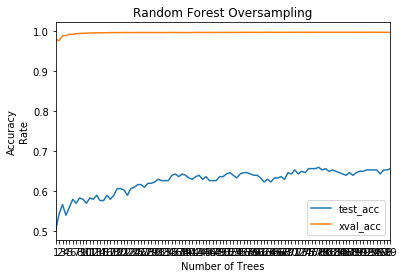

In [669]:
ax = pd.DataFrame(os_rf_dic).plot(x='Num_of_tree', title='Random Forest Oversampling', xticks=os_rf_dic['Num_of_tree'])
ax.set_ylabel('Accuracy\nRate')
ax.set_xlabel('Number of Trees')
os_best_rf_acc = max(os_rf_dic['test_acc'])
best_nt = os_rf_dic['Num_of_tree'][os_rf_dic['test_acc'].index(os_best_rf_acc)]
print('Random Forest has the best acc {:.4f} while nt = {}'.format(best_rf_acc, best_nt))

#### Report:
The minimum validation error happned when the number of estimator is 78. 

#### Model Performance

Random Forest Classifier: {n_estimators: 42}
Overall Accuracy: 0.6600
------------------------------------------------------------
Confusion Matrix
Predicted   farm  forest  grass  impervious  orchard  water
Actual                                                     
farm          42      10      0           1        0      0
forest         5      64      8           1        0      0
grass         10      12     10           3        1      0
impervious     1       1      0          38        0      0
orchard        4      36      0           0        7      0
water          6       2      1           7        0     30
------------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

       farm       0.62      0.79      0.69        53
     forest       0.51      0.82      0.63        78
      grass       0.53      0.28      0.36        36
 impervious       0.76      0.95      0.84        40
    orchard       0.88 

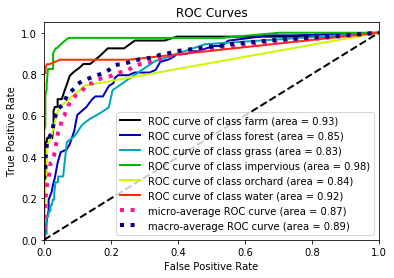

In [670]:
rfclf = RandomForestClassifier(random_state=920, n_estimators = 42)
rfclf.fit(os_x_train, os_y_train)
p = rfclf.predict(x_test)
y_probas = rfclf.predict_proba(x_test)
print('Random Forest Classifier: {n_estimators: 42}')
print('Overall Accuracy: {:.4f}'.format(os_best_rf_acc))
print('-'*60, 'Confusion Matrix', sep='\n')
print(pd.crosstab(y_test, p, rownames=['Actual'], colnames=['Predicted']))
print('-'*60, 'Classification Report', sep='\n')
print(classification_report(y_test, p))
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

#### Discuss:
On oversampled data, the random forest overall accuracy is 0.66 which is 2% higher than it on imbalance data. In the classification matrix, we found that by oversampling the minority, the random forest model is able to capture orchard group. However, the recall on orchard group prediction is only 0.15, so to speak, only 15 orchard data will be correctly classified in every 100 orchard input data.

***
## Conclusion

Before we made our conclusion, we have to understand how ROC curve work and the meaning of AUC values.  
    
ROC/AUC:
The idea for this plot is to find the best trade-off between sensitivity and specificity. In ROC curve, the y-axis is sensitivity and the x-axis is 1 minus specificity. The best scenario is we get 1 in both sensitivity and specificity, and it will show a square in the ROC plot and the area under curve is 1. However, in the most real world problem, it is impossible, so that we have to focus on what is really matter in the real world. To illustrate, a hospital is testing for the HIV. We actually don't care the specificity that much beacuse even though people are falsely tested positive, they won't do any harm to the society in the perspective of disease control. What we really care about is the people they actually have HIV. Therefore, we can use ROC curve plot to assess models to get a model with higher sensitivity. 

Generally, both acccuracy and AUC (see table 1) indicate the random forest classifier on oversamled data is the best, with 0.66 accuracy, to classify landscape data from the landsat time-series satellite and the crowdsourced data. However, we have to consider some other real world problem. For example, in business, a navigation system commpany wants to use the model to modify its map. They do want a model with high overall accuracy, but when it comes to safety issue, they have to compromise on it. Since people trust navigation systems so much, it is possible that a car drive into see due to a bad navigation systems and no navigation systems companies want that beacuse the accident like that will directly jeopardise the company. Therefore, in the navigation system business, the focus might shift from overall accuracy to the recall on water group, and they might choose the decision tree model on oversampled data since it has the highest overall accucary among the highest recalls on water. Moreover, another example for the compromise is the national park administration. In north america, there many national parks with distinct land cover. All the national park administrations will only care about the precision and recall on the particular land cover they have for their onw use.
    
In conclusion, if the purpoe of use is general, we will sugesst using the model with best accuracy, which is the random forest classifier on oversmapled data. If it is for some specific purpose like we mentioned before, we suggest taking look into the classification report or ROC curve to find the most appropriate model for that specific use.

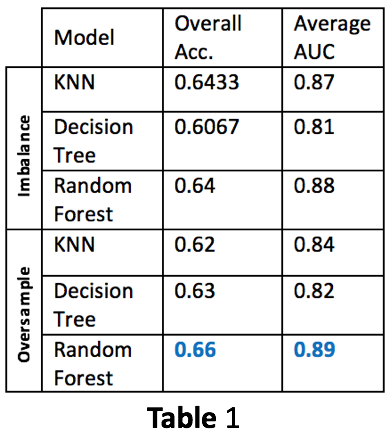

In [675]:
Image(filename=wd+'table1.png', width=250)

***
## Reference:
- **scikit-plot**: https://github.com/reiinakano/scikit-plot